<a href="https://colab.research.google.com/github/oonhy/Data/blob/main/SNU/practice_week_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

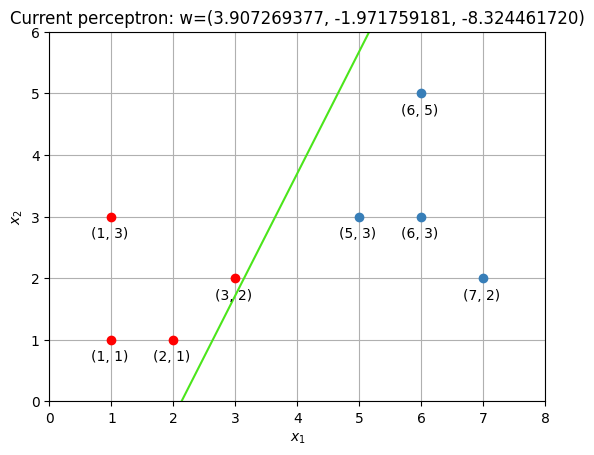

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import random

X = np.array([[1, 1], [1, 3], [2, 1], [3, 2], [5, 3], [6, 3], [6, 5], [7, 2]])
y = np.array([-1, -1, -1, -1, 1, 1, 1, 1])
y = y.reshape((X.shape[0], 1))

class Perceptron:
    def __init__(self):
        self.w = np.array([ ])

    def fit(self, X, y):
        self.w = np.random.random(X.shape[1]+1)

        is_error_there = True
        while is_error_there:
            is_error_there = False
            for x_i, y_i in zip(X, y):
                answer = self.predict(x_i)
                if answer != y_i:
                    x = np.concatenate((x_i, [1]), axis=0)
                    self.w = np.add(self.w, x*y_i)
                    self.visualize(self.w, X, y)
                    is_error_there = True

    def predict(self, x_i):
        x = np.append(x_i, [1])
        answer = self.w.dot(x)

        if answer > 0:
            answer = 1
        elif answer < 0:
            answer = -1

        return answer

    def visualize(self, w, X, y):
        clear_output(wait=True)
        plt.pause(0.01)
        plt.xlim(0,8)
        plt.ylim(0,6)
        plt.grid()
        plt.rcParams['axes.axisbelow'] = True
        plt.xlabel("$x_{1}$")
        plt.ylabel("$x_{2}$")
        plt.title("Current perceptron: w=({0:.9f}, {1:.9f}, {2:.9f})".format(self.w[0], self.w[1], self.w[2]))

        X_plus = X[4:, :]
        X_minus = X[:4, :]
        plt.scatter(X_plus[:,0], X_plus[:,1], c="#377eb8", zorder=2)
        plt.scatter(X_minus[:,0], X_minus[:,1], c="red", zorder=2)
        for i in range(len(X)):
            label = "(" + str(X[i][0]) + ", " + str(X[i][1]) + ")"
            plt.annotate(label, xy=(X[i][0], X[i][1]), xytext=(-15, -15), textcoords='offset points')

        x1_axis = np.linspace(0,8,100)
        x2_axis = -(w[0]/w[1])*x1_axis - (w[2]/w[1])
        plt.plot(x1_axis, x2_axis, color=np.random.rand(3,))
        plt.show()

perceptron = Perceptron()
perceptron.fit(X, y)

In [2]:
from sklearn.linear_model import Perceptron

X = [[1, 1], [1, 3], [2, 1], [3, 2], [5, 3], [6, 3], [6, 5], [7, 2]]
y = [-1, -1, -1, -1, 1, 1, 1, 1]

perceptron = Perceptron()
perceptron.fit(X, y)

y_hat = perceptron.predict(X)

for x, answer, prediction in zip(X, y, y_hat):
  print('Feature vector:', x, ' Answer:', answer, ' Prediction:',  prediction)

Feature vector: [1, 1]  Answer: -1  Prediction: -1
Feature vector: [1, 3]  Answer: -1  Prediction: -1
Feature vector: [2, 1]  Answer: -1  Prediction: -1
Feature vector: [3, 2]  Answer: -1  Prediction: -1
Feature vector: [5, 3]  Answer: 1  Prediction: 1
Feature vector: [6, 3]  Answer: 1  Prediction: 1
Feature vector: [6, 5]  Answer: 1  Prediction: 1
Feature vector: [7, 2]  Answer: 1  Prediction: 1


In [1]:
from sklearn import datasets

# load data
digits = datasets.load_digits()

# check 1st sample with its label
print('1st sample\n', digits.images[0], '\n')
print('It\'s label:', digits.target[0])

1st sample
 [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]] 

It's label: 0


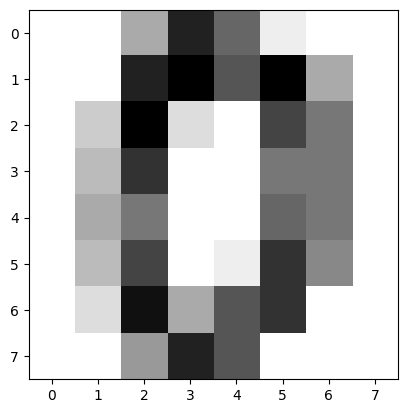

In [2]:
import matplotlib.pyplot as plt

# visualization of 1st sameple
plt.imshow(digits.images[0], cmap='binary')
plt.show()

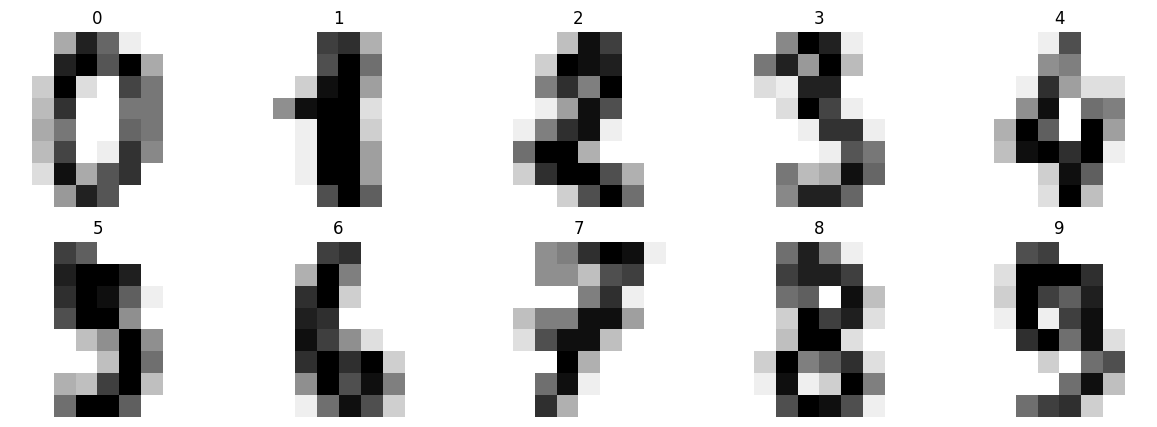

In [3]:
# visualization of first 10 samples with labels
fig = plt.figure(figsize=(15, 5))
for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.images[i], cmap='binary')
    plt.title(digits.target[i])
    plt.axis('off')
plt.show()

In [4]:
from sklearn.neural_network import MLPClassifier

# neural network (hyperparameters) design
mlp = MLPClassifier(hidden_layer_sizes=(15,),
                    activation='logistic',
                    solver='sgd',
                    learning_rate_init=.1,
                    verbose=True)

In [5]:
# dimension adjustment
X = digits.images.reshape((len(digits.images),
                           digits.images.shape[1]*digits.images.shape[2]))
print('1st sample in vector form:', X[0], '\n')

y = digits.target
print('Its label:', y[0])

1st sample in vector form: [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.] 

Its label: 0


In [8]:
# training data
X_train = X[:1000]
y_train = y[:1000]

# test data
X_test = X[1000:]
y_test = y[1000:]

In [7]:
# train neural network
mlp.fit(X_train, y_train)

Iteration 1, loss = 2.20915658
Iteration 2, loss = 1.84514445
Iteration 3, loss = 1.53328065
Iteration 4, loss = 1.23235963
Iteration 5, loss = 0.97632647
Iteration 6, loss = 0.77013307
Iteration 7, loss = 0.61411537
Iteration 8, loss = 0.49832200
Iteration 9, loss = 0.40772663
Iteration 10, loss = 0.34876755
Iteration 11, loss = 0.29722306
Iteration 12, loss = 0.25832829
Iteration 13, loss = 0.22682927
Iteration 14, loss = 0.20108309
Iteration 15, loss = 0.17811143
Iteration 16, loss = 0.16409634
Iteration 17, loss = 0.14958451
Iteration 18, loss = 0.13800695
Iteration 19, loss = 0.12916945
Iteration 20, loss = 0.12253748
Iteration 21, loss = 0.11186888
Iteration 22, loss = 0.10530071
Iteration 23, loss = 0.10042341
Iteration 24, loss = 0.09380495
Iteration 25, loss = 0.09030354
Iteration 26, loss = 0.08576128
Iteration 27, loss = 0.08252640
Iteration 28, loss = 0.07983356
Iteration 29, loss = 0.07749416
Iteration 30, loss = 0.07248068
Iteration 31, loss = 0.06978811
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(15,),
              learning_rate_init=0.1, solver='sgd', verbose=True)

In [9]:
# performance check for first 10 test samples
print('Answers:', y_test[:10])
predictions = mlp.predict(X_test)
print('Predicted values:', predictions[:10])

Answers: [1 4 0 5 3 6 9 6 1 7]
Predicted values: [2 4 0 5 3 6 9 6 1 7]


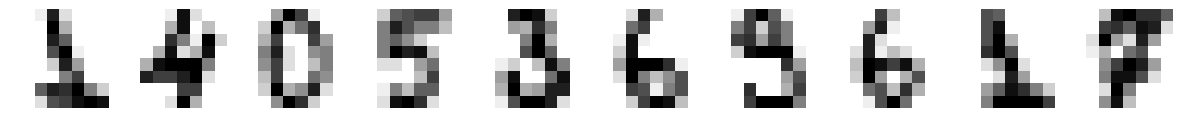

In [10]:
# visualization of fisrt 10 test samples
fig = plt.figure(figsize=(15, 5))
for i in range(1000, 1010):
    plt.subplot(1, 10, i-999)
    plt.imshow(digits.images[i], cmap='binary')
    plt.axis('off')
plt.show()

In [11]:
import pandas as pd

# confusion matrix for test data
pd.crosstab(y_test, predictions,
            rownames=['Answer'], colnames=['Predicted value'],
            margins=True)

Predicted value,0,1,2,3,4,5,6,7,8,9,All
Answer,,,,,,,,,,,
0,77,0,0,0,1,0,0,0,1,0,79
1,1,67,1,0,1,0,0,0,4,6,80
2,0,0,72,4,0,1,0,0,0,0,77
3,0,0,4,64,0,6,1,0,2,2,79
4,1,1,0,0,78,0,0,0,1,2,83
5,0,0,0,0,0,76,6,0,0,0,82
6,0,1,0,0,0,0,79,0,0,0,80
7,0,1,0,0,1,0,0,77,0,1,80
8,0,3,1,0,1,1,1,0,67,2,76
